# Requirements download

In [ ]:
!pip install -t /content/drive/MyDrive/yolo_files/ultralytics ultralytics

!wget -c /content/drive/MyDrive/yolo_files http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 128.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64

/content/drive/MyDrive/yolo_files: Scheme missing.
--2025-05-18 13:30:42--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  28.0MB/s    in 86s     

2025-05-18 13:32:08 (22.3 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

FINISHED --2025-05-18 13:32:08--
Total wall clock time: 1m 26s
Downloaded: 1 files, 1.9G in 1m 26s (22.3 MB/s)


# **Import from drive\\**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/yolo_files/ultralytics')
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!tar -xf /content/drive/MyDrive/yolo_files/VOCtrainval_11-May-2012.tar -C /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RUN

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
from tqdm import tqdm
from sklearn.model_selection import train_test_split

voc_images = 'VOCdevkit/VOC2012/JPEGImages'
voc_annotations = 'VOCdevkit/VOC2012/Annotations'
output_dir = 'voc_yolo'

classes = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]

os.makedirs(f'{output_dir}/images/train', exist_ok=True)
os.makedirs(f'{output_dir}/labels/train', exist_ok=True)
os.makedirs(f'{output_dir}/images/val', exist_ok=True)
os.makedirs(f'{output_dir}/labels/val', exist_ok=True)

for xml_file in tqdm(os.listdir(voc_annotations)):
    if not xml_file.endswith('.xml'):
        continue

    tree = ET.parse(os.path.join(voc_annotations, xml_file))
    root = tree.getroot()

    img_name = root.find('filename').text
    img_width = int(root.find('size/width').text)
    img_height = int(root.find('size/height').text)

    txt_file = img_name.replace('.jpg', '.txt')
    label_path = os.path.join(output_dir, 'labels/train', txt_file)

    src_img_path = os.path.join(voc_images, img_name)
    dst_img_path = os.path.join(output_dir, 'images/train', img_name)

    if not os.path.exists(dst_img_path):
        shutil.copy2(src_img_path, dst_img_path)

    with open(label_path, 'w') as f:
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            if cls_name not in classes:
                continue

            cls_id = classes.index(cls_name)
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            ymin = float(bbox.find('ymin').text)
            xmax = float(bbox.find('xmax').text)
            ymax = float(bbox.find('ymax').text)

            x_center = ((xmin + xmax) / 2) / img_width
            y_center = ((ymin + ymax) / 2) / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

all_images = [img for img in os.listdir(f"{output_dir}/images/train") if img.endswith(".jpg")]
train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

for img in val_images:
    src_img = os.path.join(output_dir, 'images/train', img)
    dst_img = os.path.join(output_dir, 'images/val', img)
    shutil.move(src_img, dst_img)

    label_file = img.replace('.jpg', '.txt')
    src_lbl = os.path.join(output_dir, 'labels/train', label_file)
    dst_lbl = os.path.join(output_dir, 'labels/val', label_file)
    shutil.move(src_lbl, dst_lbl)

yaml_content = f"""
train: {os.path.abspath(output_dir)}/images/train
val: {os.path.abspath(output_dir)}/images/val
nc: {len(classes)}
names: {classes}
"""

with open(f'{output_dir}/data.yaml', 'w') as f:
    f.write(yaml_content.strip())


100%|██████████| 17125/17125 [00:28<00:00, 607.12it/s]


# Train

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

# freeze layers
for name, param in model.model.named_parameters():
    if 'backbone' in name:
        param.requires_grad = False

results = model.train(
    data="/content/voc_yolo/data.yaml",
    epochs=45,
    imgsz=640,
    batch=16,
    lr0=0.01,
    val=True,
    save=True,
    augment=True,
    hsv_h=0.5,
    cutmix=0.5,
    name='yolo_voc_finetune'
)

New https://pypi.org/project/ultralytics/8.3.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.5, data=/content/voc_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.5, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_voc_finetune, nbs=64, nms=False, opset=None, optim

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1097.3±1163.8 MB/s, size: 140.4 KB)


train: Scanning /content/voc_yolo/labels/train... 13700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13700/13700 [00:10<00:00, 1278.13it/s]


train: New cache created: /content/voc_yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 541.1±370.5 MB/s, size: 137.7 KB)


val: Scanning /content/voc_yolo/labels/val... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:03<00:00, 948.30it/s] 

val: New cache created: /content/voc_yolo/labels/val.cache


Plotting labels to runs/detect/yolo_voc_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_voc_finetune
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      2.14G      1.021      2.519      1.299         20        640: 100%|██████████| 857/857 [05:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.42it/s]


                   all       3425       7930      0.564      0.555      0.559      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      3.31G      1.068      1.913      1.335         26        640: 100%|██████████| 857/857 [04:47<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.93it/s]


                   all       3425       7930      0.595      0.521      0.541      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      3.33G      1.098      1.847      1.351         19        640: 100%|██████████| 857/857 [04:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.96it/s]


                   all       3425       7930      0.576      0.512      0.526      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      3.33G      1.095      1.764      1.351         21        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.94it/s]


                   all       3425       7930      0.579      0.516      0.528      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      3.36G      1.083      1.693       1.35         14        640: 100%|██████████| 857/857 [04:43<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.92it/s]


                   all       3425       7930      0.619       0.52      0.553      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      3.37G      1.067      1.623      1.334         18        640: 100%|██████████| 857/857 [04:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.96it/s]


                   all       3425       7930      0.638       0.51      0.558      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      3.39G       1.05      1.564      1.322         19        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.90it/s]


                   all       3425       7930      0.633      0.544      0.577      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45       3.4G       1.04      1.541      1.318         23        640: 100%|██████████| 857/857 [04:47<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.04it/s]


                   all       3425       7930      0.628      0.553       0.59      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      3.43G      1.034      1.497      1.309         29        640: 100%|██████████| 857/857 [04:40<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.06it/s]


                   all       3425       7930      0.647      0.539       0.58        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      3.44G      1.025      1.468      1.302         31        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.04it/s]


                   all       3425       7930      0.634      0.552        0.6      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      3.46G      1.015       1.44      1.298         14        640: 100%|██████████| 857/857 [04:45<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930       0.66      0.563      0.613      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      3.47G          1       1.41       1.29         15        640: 100%|██████████| 857/857 [04:47<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930      0.646      0.578      0.618      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      3.49G      0.991      1.388      1.283         13        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.99it/s]


                   all       3425       7930      0.697      0.558      0.633      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      3.51G     0.9843      1.366      1.278         12        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  4.00it/s]


                   all       3425       7930      0.662       0.58      0.627      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      3.52G     0.9762      1.352      1.274         15        640: 100%|██████████| 857/857 [04:43<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930      0.692      0.572      0.638      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      3.53G     0.9702      1.319      1.264         29        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.99it/s]


                   all       3425       7930      0.677      0.584      0.643      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      3.56G      0.968      1.307      1.262         24        640: 100%|██████████| 857/857 [04:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.00it/s]


                   all       3425       7930      0.671      0.594      0.645      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      3.57G     0.9625      1.295      1.262         31        640: 100%|██████████| 857/857 [04:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.674      0.601      0.649      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45       3.6G     0.9456      1.272      1.254         18        640: 100%|██████████| 857/857 [04:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930      0.679      0.582      0.647      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45       3.6G     0.9521      1.268      1.252         14        640: 100%|██████████| 857/857 [04:39<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:25<00:00,  4.19it/s]


                   all       3425       7930      0.676      0.594      0.649      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      3.62G     0.9417      1.249      1.247         26        640: 100%|██████████| 857/857 [04:40<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.06it/s]


                   all       3425       7930      0.675      0.608      0.661       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      3.65G     0.9327       1.23      1.243         15        640: 100%|██████████| 857/857 [04:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.695        0.6      0.656      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      3.66G      0.935      1.221      1.242         15        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.11it/s]


                   all       3425       7930      0.698      0.598      0.661      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      3.67G     0.9213      1.199      1.228         23        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.04it/s]


                   all       3425       7930      0.713      0.602      0.673      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45       3.7G     0.9203      1.185       1.23         19        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.00it/s]


                   all       3425       7930      0.696      0.601      0.665      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      3.71G     0.9152      1.173      1.226         11        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.99it/s]


                   all       3425       7930      0.682      0.623      0.675      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      3.73G     0.9066      1.157       1.22         35        640: 100%|██████████| 857/857 [04:44<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.03it/s]


                   all       3425       7930      0.716      0.598      0.674      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      3.73G     0.9004      1.148      1.214         11        640: 100%|██████████| 857/857 [04:43<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  4.00it/s]


                   all       3425       7930       0.69      0.616      0.673      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      3.76G     0.8949      1.138      1.212         26        640: 100%|██████████| 857/857 [04:40<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.707      0.618       0.68      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      3.78G     0.8931      1.133       1.21         11        640: 100%|██████████| 857/857 [04:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930      0.695      0.619      0.673      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45       3.8G     0.8793      1.111      1.207         21        640: 100%|██████████| 857/857 [04:39<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930       0.71      0.619       0.68      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45       3.8G     0.8802      1.107      1.205         14        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.693      0.625      0.682      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      3.83G     0.8785      1.096      1.202         18        640: 100%|██████████| 857/857 [04:44<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.96it/s]


                   all       3425       7930      0.697      0.622      0.684      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      3.85G     0.8619      1.078      1.193         23        640: 100%|██████████| 857/857 [04:42<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.04it/s]


                   all       3425       7930      0.703      0.623      0.684      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      3.87G     0.8604      1.061      1.189         17        640: 100%|██████████| 857/857 [04:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.02it/s]


                   all       3425       7930      0.701       0.63      0.685      0.507
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      3.87G     0.8346     0.9223      1.168          7        640: 100%|██████████| 857/857 [03:47<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:27<00:00,  3.95it/s]


                   all       3425       7930      0.689      0.633       0.68      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45       3.9G     0.8138     0.8795      1.153         14        640: 100%|██████████| 857/857 [03:47<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.03it/s]


                   all       3425       7930      0.714      0.615      0.683      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      3.91G     0.8034     0.8591      1.144          7        640: 100%|██████████| 857/857 [03:44<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.10it/s]


                   all       3425       7930      0.709      0.625      0.683      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      3.93G     0.7981     0.8423       1.14          6        640: 100%|██████████| 857/857 [03:44<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.07it/s]


                   all       3425       7930      0.712      0.626      0.681      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      3.94G      0.792     0.8283      1.134          7        640: 100%|██████████| 857/857 [03:45<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.04it/s]


                   all       3425       7930      0.728      0.617      0.683      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      3.96G     0.7876     0.8163      1.131         16        640: 100%|██████████| 857/857 [03:46<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.718      0.622      0.685      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      3.98G     0.7766     0.8055      1.124          8        640: 100%|██████████| 857/857 [03:45<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:25<00:00,  4.16it/s]


                   all       3425       7930      0.725      0.627      0.687      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45         4G     0.7704     0.7936       1.12          8        640: 100%|██████████| 857/857 [03:44<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.10it/s]


                   all       3425       7930      0.735      0.624      0.688      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      4.01G     0.7669     0.7818      1.114          7        640: 100%|██████████| 857/857 [03:44<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.07it/s]


                   all       3425       7930      0.728      0.617      0.686      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      4.03G     0.7591     0.7766       1.11          4        640: 100%|██████████| 857/857 [03:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:26<00:00,  4.01it/s]


                   all       3425       7930      0.708      0.631      0.684      0.511

45 epochs completed in 3.728 hours.
Optimizer stripped from runs/detect/yolo_voc_finetune/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_voc_finetune/weights/best.pt, 6.2MB

Validating runs/detect/yolo_voc_finetune/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:39<00:00,  2.73it/s]


                   all       3425       7930      0.696      0.636      0.695       0.53
             aeroplane        142        187      0.808      0.759      0.832      0.659
               bicycle        131        182      0.632      0.547      0.664       0.52
                  bird        173        275      0.767      0.655      0.748      0.534
                  boat        107        192      0.658      0.568      0.615      0.417
                bottle        145        294      0.727      0.499      0.575      0.395
                   bus        101        153      0.874      0.719      0.805      0.684
                   car        259        515      0.726      0.555      0.673      0.492
                   cat        221        253      0.846       0.81      0.884      0.748
                 chair        271        604       0.61      0.421      0.509      0.355
                   cow         74        171      0.649      0.719      0.733      0.523
           diningtabl

# Loocking for the best hyperparameters

In [ ]:
#Այս հատվածը աշխատացնել միայն այն դեպքում երբ ուզում եք գտնել լավագույն հիպերպարամետրերը
from ultralytics import YOLO
import yaml

# Hyperparameters
hp_grid = {
    'lr0': [0.01, 0.001],
    'batch': [16, 32],
    'augment': [True, False],
    'hsv_h': [0.1, 0.5],
    'cutmix': [0.0, 0.5]
}

best_map = 0
best_config = {}

for lr in hp_grid['lr0']:
    for bs in hp_grid['batch']:
        model = YOLO('yolov8n.pt')
        results = model.train(
            data='/content/voc_yolo/data.yaml',
            epochs=1,
            imgsz=640,
            batch=bs,
            lr0=lr,
            augment=True,
            hsv_h=0.5,
            cutmix=0.5,
            name=f'yolov8x_lr{lr}_bs{bs}',
            project='hp_tuning'
        )

        try:
            current_map = results.results_dict['metrics/mAP50-95(B)']
            print(f"mAP50-95 for lr={lr}, batch={bs}: {current_map}")

            if current_map > best_map:
                best_map = current_map
                best_config = {'lr': lr, 'batch': bs}
        except KeyError:
            print("Key 'metrics/mAP50-95(B)' not found. Please check the available keys above.")

with open('best_config.yaml', 'w') as f:
    yaml.dump(best_config, f)

print(f"Best configuration found: {best_config} with mAP50-95: {best_map}")

New https://pypi.org/project/ultralytics/8.3.140 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.5, data=/content/voc_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.5, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8x_lr0.01_bs16, nbs=64, nms=False, opset=None, opti

train: Scanning /content/voc_yolo/labels/train.cache... 13700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13700/13700 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 985.3±942.5 MB/s, size: 137.7 KB)


val: Scanning /content/voc_yolo/labels/val.cache... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:00<?, ?it/s]


Plotting labels to hp_tuning/yolov8x_lr0.01_bs16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to hp_tuning/yolov8x_lr0.01_bs16
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.12G      1.021      2.519      1.299         20        640: 100%|██████████| 857/857 [05:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:34<00:00,  3.11it/s]


                   all       3425       7930      0.564      0.555      0.559      0.387

1 epochs completed in 0.097 hours.
Optimizer stripped from hp_tuning/yolov8x_lr0.01_bs16/weights/last.pt, 6.2MB
Optimizer stripped from hp_tuning/yolov8x_lr0.01_bs16/weights/best.pt, 6.2MB

Validating hp_tuning/yolov8x_lr0.01_bs16/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:39<00:00,  2.72it/s]


                   all       3425       7930      0.601      0.583      0.592      0.437
             aeroplane        142        187      0.642      0.781      0.765      0.573
               bicycle        131        182      0.735      0.396      0.575      0.424
                  bird        173        275      0.576      0.567      0.587      0.397
                  boat        107        192      0.307      0.661      0.433      0.281
                bottle        145        294      0.622      0.493      0.493       0.33
                   bus        101        153      0.761      0.732      0.787      0.667
                   car        259        515       0.72       0.42      0.609      0.448
                   cat        221        253        0.8      0.617      0.764      0.602
                 chair        271        604      0.398      0.517      0.409      0.275
                   cow         74        171       0.53       0.55      0.567      0.394
           diningtabl

train: Scanning /content/voc_yolo/labels/train.cache... 13700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13700/13700 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 584.7±177.6 MB/s, size: 137.7 KB)


val: Scanning /content/voc_yolo/labels/val.cache... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:00<?, ?it/s]


Plotting labels to hp_tuning/yolov8x_lr0.01_bs32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to hp_tuning/yolov8x_lr0.01_bs32
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.54G      1.008      2.624      1.291         16        640: 100%|██████████| 429/429 [04:58<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:34<00:00,  1.55it/s]


                   all       3425       7930      0.552      0.577      0.562      0.388

1 epochs completed in 0.094 hours.
Optimizer stripped from hp_tuning/yolov8x_lr0.01_bs32/weights/last.pt, 6.2MB
Optimizer stripped from hp_tuning/yolov8x_lr0.01_bs32/weights/best.pt, 6.2MB

Validating hp_tuning/yolov8x_lr0.01_bs32/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:53<00:00,  1.01it/s]


                   all       3425       7930      0.607      0.574      0.593       0.43
             aeroplane        142        187      0.709       0.69       0.75      0.577
               bicycle        131        182      0.782      0.346      0.547      0.407
                  bird        173        275      0.699      0.557      0.614       0.39
                  boat        107        192      0.452      0.562      0.498      0.314
                bottle        145        294      0.682      0.432      0.491      0.305
                   bus        101        153      0.711      0.706      0.737      0.621
                   car        259        515      0.642      0.524      0.598      0.428
                   cat        221        253      0.814      0.711       0.83      0.639
                 chair        271        604      0.257      0.508       0.32      0.197
                   cow         74        171      0.769      0.467      0.613      0.397
           diningtabl

train: Scanning /content/voc_yolo/labels/train.cache... 13700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13700/13700 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 551.8±118.6 MB/s, size: 137.7 KB)


val: Scanning /content/voc_yolo/labels/val.cache... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:00<?, ?it/s]


Plotting labels to hp_tuning/yolov8x_lr0.001_bs16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to hp_tuning/yolov8x_lr0.001_bs16
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.11G      1.021      2.519      1.299         20        640: 100%|██████████| 857/857 [05:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.38it/s]


                   all       3425       7930      0.564      0.555      0.559      0.387

1 epochs completed in 0.096 hours.
Optimizer stripped from hp_tuning/yolov8x_lr0.001_bs16/weights/last.pt, 6.2MB
Optimizer stripped from hp_tuning/yolov8x_lr0.001_bs16/weights/best.pt, 6.2MB

Validating hp_tuning/yolov8x_lr0.001_bs16/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:40<00:00,  2.65it/s]


                   all       3425       7930      0.601      0.583      0.592      0.437
             aeroplane        142        187      0.642      0.781      0.765      0.573
               bicycle        131        182      0.735      0.396      0.575      0.424
                  bird        173        275      0.576      0.567      0.587      0.397
                  boat        107        192      0.307      0.661      0.433      0.281
                bottle        145        294      0.622      0.493      0.493       0.33
                   bus        101        153      0.761      0.732      0.787      0.667
                   car        259        515       0.72       0.42      0.609      0.448
                   cat        221        253        0.8      0.617      0.764      0.602
                 chair        271        604      0.398      0.517      0.409      0.275
                   cow         74        171       0.53       0.55      0.567      0.394
           diningtabl

train: Scanning /content/voc_yolo/labels/train.cache... 13700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13700/13700 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 463.3±139.6 MB/s, size: 137.7 KB)


val: Scanning /content/voc_yolo/labels/val.cache... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:00<?, ?it/s]


Plotting labels to hp_tuning/yolov8x_lr0.001_bs32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to hp_tuning/yolov8x_lr0.001_bs32
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.54G      1.008      2.624      1.291         16        640: 100%|██████████| 429/429 [05:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]


                   all       3425       7930      0.552      0.577      0.562      0.388

1 epochs completed in 0.096 hours.
Optimizer stripped from hp_tuning/yolov8x_lr0.001_bs32/weights/last.pt, 6.2MB
Optimizer stripped from hp_tuning/yolov8x_lr0.001_bs32/weights/best.pt, 6.2MB

Validating hp_tuning/yolov8x_lr0.001_bs32/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:42<00:00,  1.27it/s]


                   all       3425       7930      0.607      0.574      0.593       0.43
             aeroplane        142        187      0.709       0.69       0.75      0.577
               bicycle        131        182      0.782      0.346      0.547      0.407
                  bird        173        275      0.699      0.557      0.614       0.39
                  boat        107        192      0.452      0.562      0.498      0.314
                bottle        145        294      0.682      0.432      0.491      0.305
                   bus        101        153      0.711      0.706      0.737      0.621
                   car        259        515      0.642      0.524      0.598      0.428
                   cat        221        253      0.814      0.711       0.83      0.639
                 chair        271        604      0.257      0.508       0.32      0.197
                   cow         74        171      0.769      0.467      0.613      0.397
           diningtabl

# Save «Yolo_Voc_Finetune» to Drive

In [ ]:
import shutil
source_folder = '/content/runs/detect/yolo_voc_finetune/'
destination_folder = '/content/drive/MyDrive/yolo_files/yolo_voc_finetune'

shutil.copytree(source_folder, destination_folder)
print(f"Folder '{source_folder}' copied to '{destination_folder}' in your Google Drive.")


Folder '/content/runs/detect/yolo_voc_finetune/' copied to '/content/drive/MyDrive/yolo_files/yolo_voc_finetune' in your Google Drive.


# Detect

In [ ]:
from ultralytics import YOLO
model = YOLO('runs/detect/yolo_voc_finetune/weights/best.pt')
results = model.predict(
    source='/content/voc_yolo/images/train/2007_000027.jpg',
    conf=0.5,
    save=True
)


image 1/1 /content/voc_yolo/images/train/2007_000027.jpg: 640x640 1 person, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [9]:
from ultralytics import YOLO

model = YOLO('runs/detect/yolo_voc_finetune/weights/best.pt')
results = model.val()

print(f"mAP@50 - ACCURACY: {results.box.map50}")

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1259.4±479.4 MB/s, size: 74.0 KB)



val: Scanning /content/voc_yolo/labels/val... 3425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3425/3425 [00:02<00:00, 1688.63it/s]


val: New cache created: /content/voc_yolo/labels/val.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 215/215 [11:22<00:00,  3.17s/it]


                   all       3425       7799      0.828      0.762      0.836      0.671
             aeroplane        153        191      0.923      0.853      0.924      0.771
               bicycle         95        126      0.766        0.7      0.792      0.633
                  bird        160        232      0.906      0.797      0.844       0.67
                  boat        105        181      0.776      0.669      0.721      0.508
                bottle        155        332        0.8      0.599      0.687      0.487
                   bus         94        133      0.916      0.827      0.909      0.793
                   car        267        484       0.86      0.634      0.795      0.616
                   cat        244        279      0.918      0.882       0.94      0.792
                 chair        270        626      0.784      0.604      0.722      0.538
                   cow         63        183       0.86      0.806      0.883      0.667
           diningtabl

# PLOT

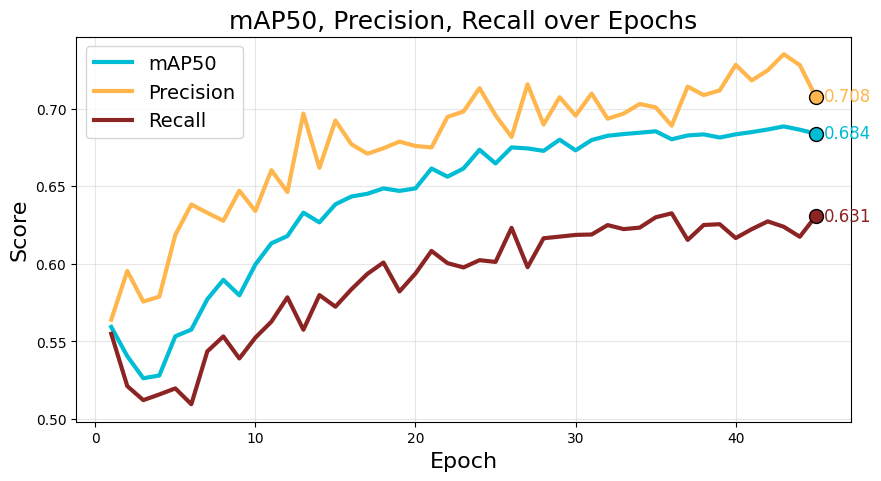

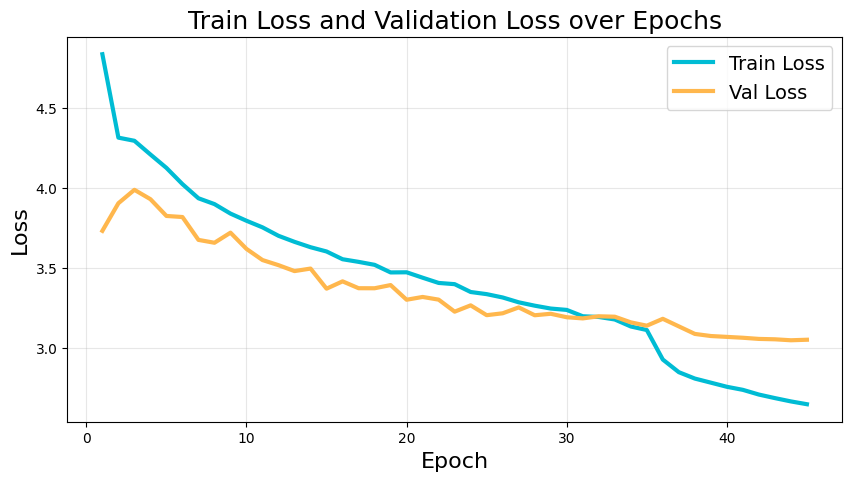

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/runs/detect/yolo_voc_finetune/results.csv')

epoch = data['epoch']
map50 = data['metrics/mAP50(B)']
precision = data['metrics/precision(B)']
recall = data['metrics/recall(B)']

train_loss = data['train/box_loss'] + data['train/cls_loss'] + data['train/dfl_loss']
val_loss = data['val/box_loss'] + data['val/cls_loss'] + data['val/dfl_loss']

"""Plot 1: mAP50, precision, recall"""
plt.figure(figsize=(10, 5))
plt.plot(epoch, map50, label='mAP50', color='#00bcd4', linewidth=3)
plt.plot(epoch, precision, label='Precision', color='#ffb74d', linewidth=3)
plt.plot(epoch, recall, label='Recall', color='#8d2424', linewidth=3)

plt.scatter(epoch.iloc[-1], map50.iloc[-1], color='#00bcd4', s=100, edgecolor='k', zorder=5)
plt.scatter(epoch.iloc[-1], precision.iloc[-1], color='#ffb74d', s=100, edgecolor='k', zorder=5)
plt.scatter(epoch.iloc[-1], recall.iloc[-1], color='#8d2424', s=100, edgecolor='k', zorder=5)

plt.text(epoch.iloc[-1]+0.5, map50.iloc[-1], f"{map50.iloc[-1]:.3f}", color='#00bcd4', fontsize=12, va='center')
plt.text(epoch.iloc[-1]+0.5, precision.iloc[-1], f"{precision.iloc[-1]:.3f}", color='#ffb74d', fontsize=12, va='center')
plt.text(epoch.iloc[-1]+0.5, recall.iloc[-1], f"{recall.iloc[-1]:.3f}", color='#8d2424', fontsize=12, va='center')

plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('mAP50, Precision, Recall over Epochs', fontsize=18)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()

"""Plot 2: Train loss, Val loss"""
plt.figure(figsize=(10, 5))
plt.plot(epoch, train_loss, label='Train Loss', color='#00bcd4', linewidth=3)
plt.plot(epoch, val_loss, label='Val Loss', color='#ffb74d', linewidth=3)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Train Loss and Validation Loss over Epochs', fontsize=18)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()


# Import yolo_voc_finetune from Drive

In [ ]:
import shutil
source_folder = '/content/drive/MyDrive/yolo_files/yolo_voc_finetune'
destination_folder = '/content/runs/detect/yolo_voc_finetune/'

shutil.copytree(source_folder, destination_folder)
print(f"Folder '{source_folder}' copied to '{destination_folder}' in CoLab Content.")

Folder '/content/drive/MyDrive/yolo_files/yolo_voc_finetune' copied to '/content/runs/detect/yolo_voc_finetune/' in CoLab Content.
